# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata



%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.01318799999999998
Average number of iterations in training is 75.333.


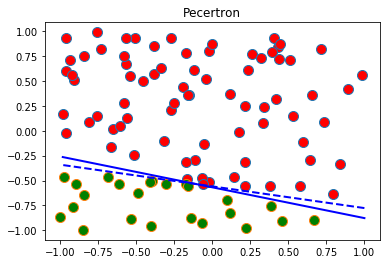

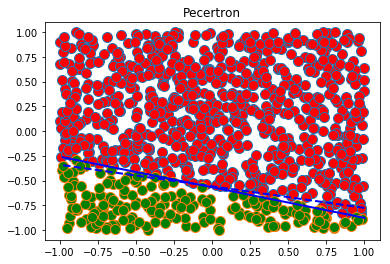

In [6]:
from perceptron import perceptron

nRep = 1000# number of replicates
nTrain = 100 # number of training data
nTest = 1000# number of testing data
error_rate_training = 0
error_rate_testing = 0
sum_iterations = 0
# sum_iterations_test = 0
for i in range(nRep):
    
    X, y, w_f = mkdata(nTrain)
#     print(X)
#     print("=================")
#     print(y.shape)
#     print("=================")
#     print(w_f.shape)
#     print("+++++++++++++++++")
#     print("y_gt: {}".format(y))
    w_g, iters = perceptron(X, y)
    
#     print("final learned weight: {}".format(w_g))
    # YOUR CODE HERE
    # Compute training, testing error
    y_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
#     print("final computation: {}".format(y_prediction))
    error_idx = np.argwhere(np.multiply(y_prediction, y) < 0)
#     print("The final index:{}, the shape is:{}".format(error_idx, error_idx.shape))
    tmp_error_count = (error_idx.shape[0])
    tmp_error_rate = tmp_error_count/nTrain
    error_rate_training = error_rate_training + tmp_error_rate
    # Sum up number of iterations
    sum_iterations = sum_iterations + iters
    # Test
    #data generation according to mkdata.py
    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
    tmp_error_count_test = (error_idx_test.shape[0])
    tmp_error_rate_test = tmp_error_count_test/nTest
    error_rate_testing = error_rate_testing + tmp_error_rate_test
#     sum_iterations_test = sum_iterations_test + iters_test
    
avgIter = sum_iterations/nRep
# avgIter_test = sum_iterations_test/nRep
E_train = error_rate_training/nRep
E_test = error_rate_testing/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('E_train is {}, E_test is {}'.format(E_train, 0))
# print('Average number of iterations is {}.'.format(avgIter))
print('Average number of iterations in training is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

# print('Average number of iterations in testing is {}.'.format(avgIter_test))
plotdata(X_test, y_test, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [5]:
from perceptron import perceptron
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


KeyboardInterrupt: 

### Part3: Linear Regression

E_train is 0.03914000000000008, E_test is 0.04868100000000006


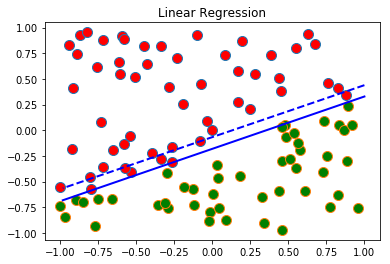

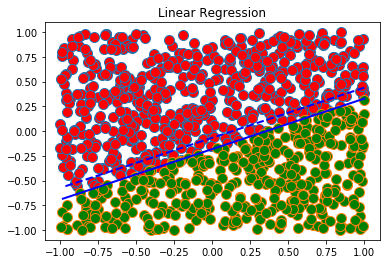

In [26]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 1000 # number of testing data
error_rate_training = 0
error_rate_testing = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    new_X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)
    y_prediction = np.matmul(new_X.T, w_g)
    y_prediction = np.sign(y_prediction)
#     print(y, y_prediction)
    # Compute training, testing error
    error_idx = np.argwhere(np.multiply(y_prediction, y.T) < 0)
    tmp_error_count = (error_idx.shape[0])
#     print(error_idx.shape[0])
    tmp_error_rate = tmp_error_count/nTrain
    error_rate_training = error_rate_training + tmp_error_rate
    
    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
    tmp_error_count_test = (error_idx_test.shape[0])
    tmp_error_rate_test = tmp_error_count_test/nTest
    error_rate_testing = error_rate_testing + tmp_error_rate_test
    

E_train = error_rate_training/nRep
E_test = error_rate_testing/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression');
plotdata(X_test, y_test, w_f, w_g, 'Linear Regression');

## Part4: Linear Regression: noisy

E_train is 0.13304000000000002, E_test is 0.06085299999999994


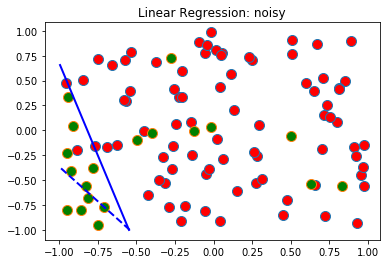

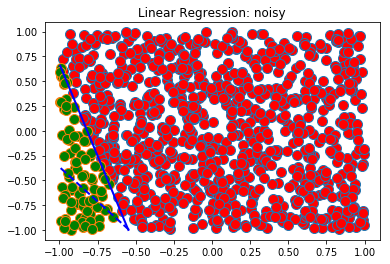

In [29]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 1000 # number of testing data
error_rate_training = 0
error_rate_testing = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y);
    # Compute training, testing error
    new_X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)
    y_prediction = np.matmul(new_X.T, w_g)
    y_prediction = np.sign(y_prediction)
#     print(y, y_prediction)
    # Compute training, testing error
    error_idx = np.argwhere(np.multiply(y_prediction, y.T) < 0)
    tmp_error_count = (error_idx.shape[0])
#     print(error_idx.shape[0])
    tmp_error_rate = tmp_error_count/nTrain
    error_rate_training = error_rate_training + tmp_error_rate
    
    # test 
    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
    tmp_error_count_test = (error_idx_test.shape[0])
    tmp_error_rate_test = tmp_error_count_test/nTest
    error_rate_testing = error_rate_testing + tmp_error_rate_test
    
E_train = error_rate_training/nRep
E_test = error_rate_testing/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');
plotdata(X_test, y_test, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [5]:
import scipy.io as sio
from linear_regression import linear_regression
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error

error_rate_training = 0
error_rate_testing = 0

new_X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)
y_prediction = np.matmul(new_X.T, w)
y_prediction = np.sign(y_prediction)
error_idx = np.argwhere(np.multiply(y_prediction, y.T) < 0)
tmp_error_count = (error_idx.shape[0])
error_rate_training = tmp_error_count/X.shape[1]


y_test_prediction = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
tmp_error_count_test = (error_idx_test.shape[0])
error_rate_testing = tmp_error_count_test/X_test.shape[1]
    
E_train = error_rate_training
E_test = error_rate_testing
print('E_train is {}, E_test is {}'.format(E_train, E_test))
# plotdata(X, y, w_f, w_g, 'Linear Regression: poly_fit');
# plotdata(X_test, y_test, w_f, w_g, 'Linear Regression: poly_fit');

# poly_fit with transform
transform_p1 = np.multiply(X[0, :], X[1, :]).reshape(-1,1).T
transform_p2 = np.multiply(X[0, :], X[0, :]).reshape(-1,1).T
transform_p3 = np.multiply(X[1, :], X[1, :]).reshape(-1,1).T

transform_p1_test = np.multiply(X_test[0, :], X_test[1, :]).reshape(-1,1).T
transform_p2_test = np.multiply(X_test[0, :], X_test[0, :]).reshape(-1,1).T
transform_p3_test = np.multiply(X_test[1, :], X_test[1, :]).reshape(-1,1).T

X_t = np.vstack((np.vstack((np.vstack((X, transform_p1)), transform_p2)), transform_p3)) # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t =  np.vstack((np.vstack((np.vstack((X_test, transform_p1_test)), transform_p2_test)), transform_p3_test))  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
error_rate_training = 0
error_rate_testing = 0
                       
new_X_t = np.concatenate((np.ones((1, X_t.shape[1])), X_t), axis=0)
y_prediction_t = np.matmul(new_X_t.T, w)
y_prediction_t = np.sign(y_prediction_t)
error_idx = np.argwhere(np.multiply(y_prediction_t, y.T) < 0)
tmp_error_count = (error_idx.shape[0])
error_rate_training = tmp_error_count/X_t.shape[1]

y_test_prediction_t = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))))
error_idx_test = np.argwhere(np.multiply(y_test_prediction_t, y_test) < -0.)
tmp_error_count_test = (error_idx_test.shape[0])
error_rate_testing = tmp_error_count_test/X_test.shape[1]
E_train = error_rate_training
E_test = error_rate_testing
print('E_train is {}, E_test is {}'.format(E_train, E_test))
# plotdata(X, y, w_f, w_g, 'Linear Regression: training poly_fit with transformation');
# plotdata(X_test, y_test, w_f, w_g, 'Linear Regression: training poly_fit with transformation');

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.045799999999999945, E_test is 0.05258


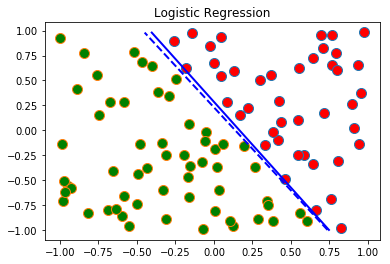

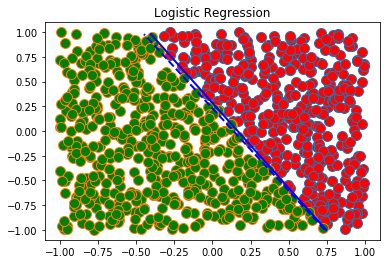

In [2]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 1000 # number of testing data
error_rate_training = 0
error_rate_testing = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y)
    # Compute training, testing error\
    y_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))
    y_prediction = np.where(y_prediction > 0.5, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_prediction, y) < 0)
    tmp_error_count = (error_idx.shape[0])
    tmp_error_rate = tmp_error_count/nTrain
    error_rate_training = error_rate_training + tmp_error_rate

    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    y_test_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_prediction = np.where(y_test_prediction > 0.5, 1., -1.)
    error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
    tmp_error_count_test = (error_idx_test.shape[0])
    tmp_error_rate_test = tmp_error_count_test/nTest
    error_rate_testing = error_rate_testing + tmp_error_rate_test
    
E_train = error_rate_training/nRep
E_test = error_rate_testing/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Logistic Regression')
plotdata(X_test, y_test, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.15480000000000008, E_test is 0.08813000000000003


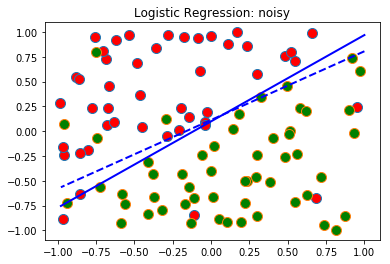

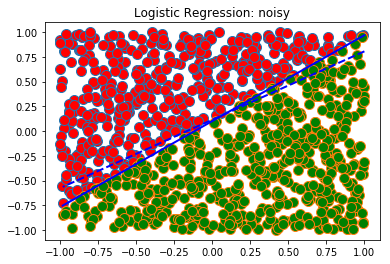

In [3]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 1000; # number of training data
error_rate_training = 0
error_rate_testing = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    # Compute training, testing error
    y_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))
    y_prediction = np.where(y_prediction > 0.5, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_prediction, y) < 0)
    tmp_error_count = (error_idx.shape[0])
    tmp_error_rate = tmp_error_count/nTrain
    error_rate_training = error_rate_training + tmp_error_rate

    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    y_test_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_prediction = np.where(y_test_prediction > 0.5, 1., -1.)
    error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
    tmp_error_count_test = (error_idx_test.shape[0])
    tmp_error_rate_test = tmp_error_count_test/nTest
    error_rate_testing = error_rate_testing + tmp_error_rate_test

E_train = error_rate_training/nRep
E_test = error_rate_testing/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')
plotdata(X_test, y_test, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.014366666666666628, E_test is 0.04064099999999998
Average number of support vectors is 3.835.


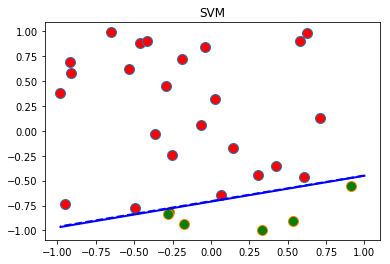

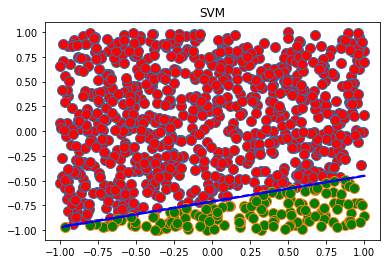

In [48]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 30; # number of training data
nTest = 1000;
error_rate_training = 0
error_rate_testing = 0
sum_num_sc = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    y_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))
    y_prediction = np.where(y_prediction > 0, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_prediction, y) < 0)
    tmp_error_count = (error_idx.shape[0])
    tmp_error_rate = tmp_error_count/nTrain
    error_rate_training = error_rate_training + tmp_error_rate
    
    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    y_test_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_prediction = np.where(y_test_prediction > 0, 1., -1.)
    error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
    tmp_error_count_test = (error_idx_test.shape[0])
    tmp_error_rate_test = tmp_error_count_test/nTest
    error_rate_testing = error_rate_testing + tmp_error_rate_test
    
    # Sum up number of support vectors
    sum_num_sc = sum_num_sc + num_sc
   
E_train = error_rate_training/nRep
E_test = error_rate_testing/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
avgNum = sum_num_sc / nRep
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')
plotdata(X_test, y_test, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.009559999999999893, E_test is 0.01817899999999994
Average number of support vectors is 9.632.


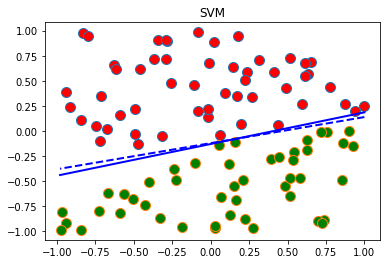

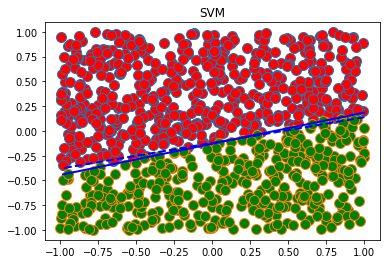

In [47]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 1000;
error_rate_training = 0
error_rate_testing = 0
sum_num_sc = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    y_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))
    y_prediction = np.where(y_prediction > 0, 1., -1.)
    error_idx = np.argwhere(np.multiply(y_prediction, y) < 0)
    tmp_error_count = (error_idx.shape[0])
    tmp_error_rate = tmp_error_count/nTrain
    error_rate_training = error_rate_training + tmp_error_rate
    
    data_range = np.array([-1, 1])
    X_test = np.random.random((2, nTest)) * (data_range[1] - data_range[0]) + data_range[0]
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    y_test_prediction = np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_prediction = np.where(y_test_prediction > 0, 1., -1.)
    error_idx_test = np.argwhere(np.multiply(y_test_prediction, y_test) < -0.)
    tmp_error_count_test = (error_idx_test.shape[0])
    tmp_error_rate_test = tmp_error_count_test/nTest
    error_rate_testing = error_rate_testing + tmp_error_rate_test
    
    # Sum up number of support vectors
    sum_num_sc = sum_num_sc + num_sc
   
E_train = error_rate_training/nRep
E_test = error_rate_testing/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
avgNum = sum_num_sc / nRep
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')
plotdata(X_test, y_test, w_f, w_g, 'SVM')